In [7]:
## PROVIDED CODE (converted to Python)

#############################################################
## McMaster - Modeling Starter Kit
## 2024 Workshop
#############################################################

In [8]:
#### Load Libraries
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod.families import Gamma
import numpy as np

In [9]:
#### Load Claims dataset
claims = pd.read_csv("./Qualification_Package/Claims_Years_1_to_3.csv")
print(claims['claim_amount'].mean())

1187.758451280604


In [10]:
def get_avg_sev(var, data):
    agg = data.groupby(var).agg({'claim_amount': 'mean', var: 'count'}).rename(columns={'claim_amount': 'Severity', var: 'Claim_Count'})
    scale_factor = round(max(agg['Claim_Count']) / max(agg['Severity']), 2)
    agg.plot(kind='line', y='Severity')
    agg.plot(kind='bar', y='Claim_Count', alpha=0.1, color='black')

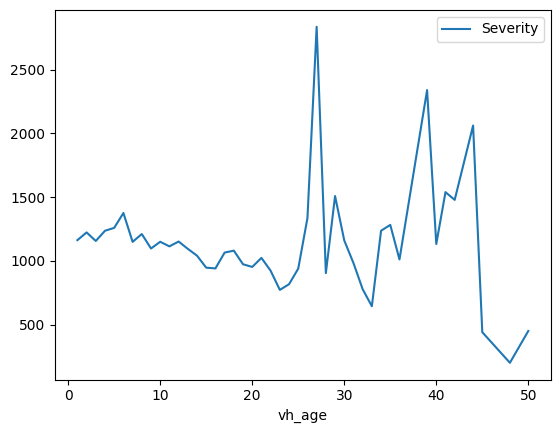

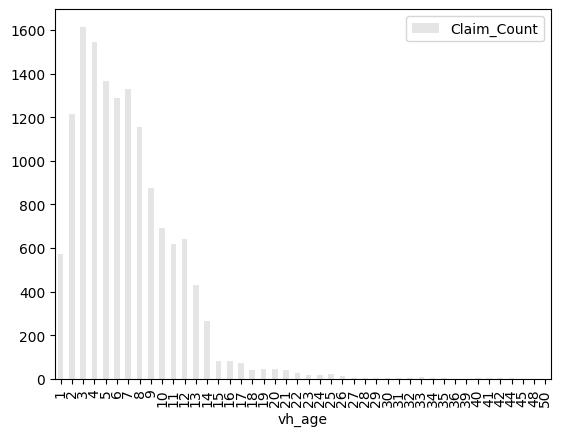

In [11]:
get_avg_sev("vh_age", claims)
# Repeat for other variables...

In [12]:
#### Create a training set, a validation set, and a test set.
claims['random_value'] = np.random.permutation(claims.index) / len(claims)
train = claims[claims['random_value'] < .6]
validation = claims[(claims['random_value'] >= .6) & (claims['random_value'] < .8)]
test = claims[claims['random_value'] >= .8]

In [13]:
#### Create a model.
X = train[['drv_age1', 'vh_age']]
X = sm.add_constant(X)  # Adds a constant term to the predictor
glm = GLM(train['claim_amount'], X, family=Gamma()).fit()
print(glm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           claim_amount   No. Observations:                 8504
Model:                            GLM   Df Residuals:                     8501
Model Family:                   Gamma   Df Model:                            2
Link Function:           InversePower   Scale:                          2.1402
Method:                          IRLS   Log-Likelihood:                -69907.
Date:                Thu, 22 Feb 2024   Deviance:                       9859.4
Time:                        21:09:02   Pearson chi2:                 1.82e+04
No. Iterations:                     8   Pseudo R-squ. (CS):           0.001620
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009   5.53e-05     17.103      0.0

c:\Users\kyle\OneDrive\Programs\Cooperators_2024\.venv\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


In [14]:
#### Assess model fit
# get prediction from model on training set.
X_validation = validation[['drv_age1', 'vh_age']]
X_validation = sm.add_constant(X_validation)
validation['Severity_Estimate'] = glm.predict(X_validation)

C:\Users\kyle\AppData\Local\Temp\ipykernel_12264\3625322036.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Severity_Estimate'] = glm.predict(X_validation)


In [15]:
#### Create something to visualize model fit
def compare_predictions(var, data):
    agg = data.groupby(var).agg({'claim_amount': 'mean', 'Severity_Estimate': 'mean'}).rename(columns={'claim_amount': 'Severity'})
    agg.plot(kind='line', y=['Severity', 'Severity_Estimate'])

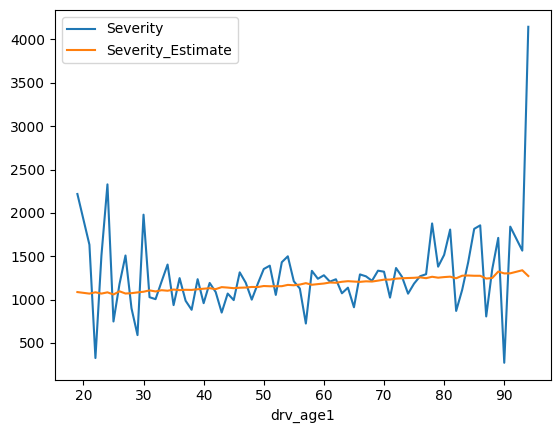

In [16]:
compare_predictions("drv_age1", validation)

In [17]:
#### Calculate RMSE for predictions
def RMSE(x, y):
    MSE = ((y - x) ** 2).mean()
    return np.sqrt(MSE)

# This benchmark RMSE is 2193.342.
# We must iterate from here to get a better model, either with GLM, machine learning, or something else.
print(RMSE(validation['claim_amount'], validation['Severity_Estimate']))


1432.5532685218946
